# Homework 3

## Draw Data Using Inverse Transform Sampling

A half-normal distribution is often denoted as $N^+(0, \sigma^2)$, which means it is a distribution obtained by truncating a normal distribution $N(0, \sigma^2)$ at the point of `0` and keeping only the positive part (thus the "+" sign) of it. Since it cuts the **underlying normal distribution** into half, it is called a **half-normal distribution**. As you can see from the following graph, the density of $N^+(0, \sigma^2)$ is twice as higher than that of the $N(0, \sigma^2)$.

This homework problem asks you to draw samples from the half-normal distribution $N^+(0, 2)$. It can be done in several ways.

<p><a href="https://commons.wikimedia.org/wiki/File:Half_normal_pdf.svg#/media/File:Half_normal_pdf.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Half_normal_pdf.svg/1200px-Half_normal_pdf.svg.png" width=500></a></p>
image by Nagelum - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=58393258




### Define a half-normal distribution using `Distributions.jl`, then use `rand()` to generate 5,000 random values. Draw a histogram of the data and overlay it with the theoretical density plot of $N^+(0,2)$.

 - Hint: You need `Distributions` to define distributions and `StatsPlots` to draw the histogram and the overlaying density plot. You may also 

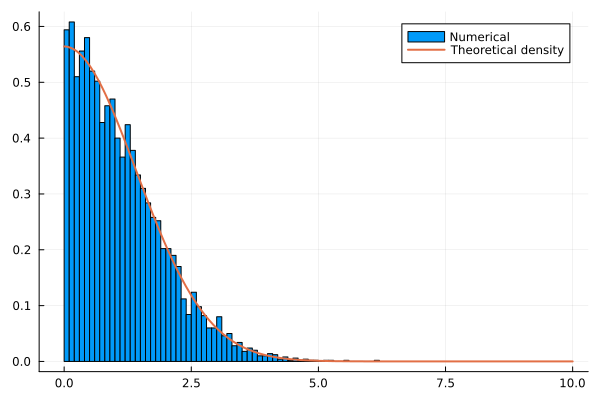

In [19]:
using Distributions, StatsPlots, StatsFuns

σ=sqrt(2)
# Define a half-normal distribution with σ=sqrt(2)
# TruncatedNormal(mu, sigma, lower bound, upper bound)
hn = TruncatedNormal(0, σ, 0, Inf) 


# Generate 5000 random values
rand_hn1 = rand(hn, 5000)

# Plot the histogram and overlay it with the theoretical density plot
histogram(rand_hn1, normalize=true, bins=:sqrt, label="Numerical")

# normalize=true gives probability
# normalize=false gives numbers
# bins=:sqrt 是一個直方圖的分組方式，可以將數據劃分為大約相等的組數

plot!(x -> pdf(hn, x), 0,10,linewidth=2, label="Theoretical density")
# pdf(hn, x) 代表在 x 周圍的機率密度函數值
# x -> pdf(hn, x) 是匿名函數寫法
# 相當於 f(x)=pdf(hn,x)

# 0,10 是選定繪圖範圍


### (Very similar to the above) Define a half-normal distribution using `Distributions.jl`, then use `quantile()` to generate 5,000 random values. Draw a histogram of the data and overlay it with the theoretical density plot of $N^+(0,2)$. 

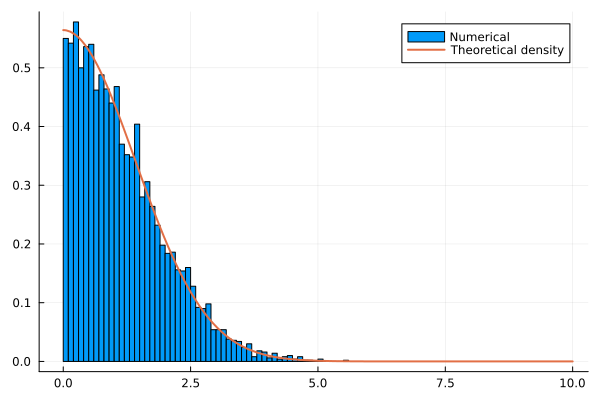

In [20]:
using Distributions, StatsPlots, StatsFuns

σ=sqrt(2)
# Define a half-normal distribution with σ=sqrt(2)
# TruncatedNormal(mu, sigma, lower bound, upper bound)
hn = TruncatedNormal(0, σ, 0, Inf) 


# Generate 5000 random values
rand_hn2 = quantile(hn, rand(5000)) 

# Plot the histogram and overlay it with the theoretical density plot
histogram(rand_hn2, normalize=true, bins=:sqrt, label="Numerical")

plot!(x -> pdf(hn, x),0,10, linewidth=2, label="Theoretical density")


### Now, the above approaches are easy to implement in Julia because you could define a half-normal distribution using Julia's `Distributions.jl`. What if not? What if you are working with a software that has the quantile function, the normal distribution function, but does not have a pre-defined half-normal distribution function? Well, we can still draw 5,000 random values using the following line. Explain the logic of this line of code. Draw a histogram of the data and overlay it with the theoretical density plot of $N^+(0,2)$. 
```julia
data3 = quantile(Normal(0, sqrt(2)), 0.5*rand(5000) .+ 0.5)
```




1. 使用`Normal(0, sqrt(2))`產生一個$N(0,sqrt(2))$。
2. 使用`rand(5000)`生成一個包含5000個$U(0,1)$的隨機向量。
3. 將上一步中生成的隨機向量乘以0.5，然後加上0.5，得到一個包含5000個$U(0.5,1)$的隨機數的向量。
4. 使用`quantile`函數，將隨機向量中的每個值視為一個機率，然後回傳常態分佈中相應機率的值。

data3向量是一個包含5000個非負值的隨機樣本，因為$U(0.5,1)$所以取得cdf底下面積範圍必>0.5。

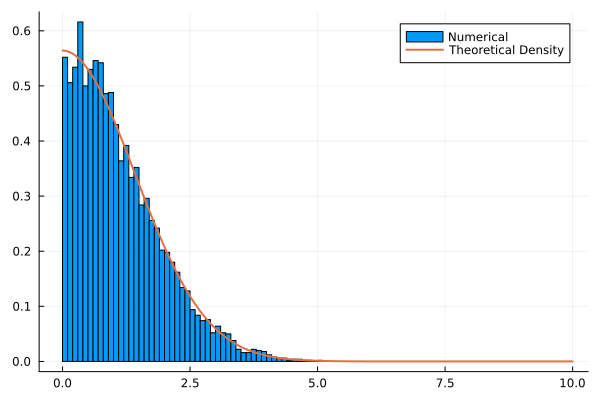

In [21]:
hn = TruncatedNormal(0, sqrt(2), 0, Inf) 

data3 = quantile(Normal(0, sqrt(2)), 0.5*rand(5000) .+ 0.5)

histogram(data3, normalize=true, bins=:sqrt, label="Numerical")

plot!(x->pdf(hn,x), 0, 10, linewidth=2, label="Theoretical Density")


### The theoretical mean and variance of the distribution are $\sigma \sqrt{\frac{2}{\pi}}$ and $\sigma^2 \left(1-\frac{2}{\pi}\right)$, respectively. Compare the means and standard deviations of the three datasets you generated to the theoretical values.

In [24]:
println("The theoretical mean of N(0,sqrt(2)) is $(sqrt(2)*sqrt(2/π))")
println("The theoretical variance of N(0, sqrt(2)) is $(2*(1-(2/π)))")

@show mean(rand_hn1), var(rand_hn1)
@show mean(rand_hn2), var(rand_hn2)
@show mean(data3), var(data3)

The theoretical mean of N(0,sqrt(2)) is 1.1283791670955128
The theoretical variance of N(0, sqrt(2)) is 0.7267604552648372
(mean(rand_hn1), var(rand_hn1)) = (1.1278417911541305, 0.752384749693228)
(mean(rand_hn2), var(rand_hn2)) = (1.1544149324722779, 0.7663373814947694)
(mean(data3), var(data3)) = (1.1246002363286396, 0.720244263221663)


(1.1246002363286396, 0.720244263221663)

##  In the class, we showed how to transform values from a normal random variable $X \sim F_X(X)$ to values of an exponential random variable $Z \sim F_Z(Z)$. We used a three-step procedure to do this, and we drew graphs to have a visual confirmation on the transformation. This homework problem asks you to modify the graphs we used in class and observe the relationship between the sample size (`n` in the example) and the approximation of the distribution.

### Take a random sample $X$ of `n` measurements from $N(1,2)$ (note: the variance is 2), and draw a histogram of $X$ and compare it to the true $N(1,2)$ density (by overlaying the density to the histogram). Add a slider of $n$ from 100 to 20000. 
- Hint: You need to use packages of `Distributions`, `Plots`, `Interact`, `WebIO`, `StatsPlots`.
- Hint: Use `@manipulate` with a `for` loop.

In [25]:
using Distributions, Plots, Interact, WebIO, StatsPlots

function plot_histogram(n::Int)
    # Generate random sample from N(1, 2) distribution
    x = rand(Normal(1, sqrt(2)), n)

    # Plot histogram of the sample with overlay of true density
    histogram(x, bins=:sqrt, normalize=true, alpha=0.5, label="Sample")
    plot!(Normal(1, sqrt(2)), lw=2, label="True Density", title="Sample Size: $n", xlabel="x", ylabel="Density")

end


@manipulate for n in 100:100:20000 # 100, 200, 300, ..., 20000
    plot_histogram(n)
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000017e786b30, Task (runnable) @0x000000017e786b30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3300\",\"3400\",\"3500\",\"3600

### Continue from the above: Transform $X$ to $Y \sim U(0,1)$, and draw a histogram of $Y$ and compare it to a $U(0,1)$. Overlaying the histogram by the density plot of $U(0,1)$.
Hint: You will need `cdf()` function to transform `X` to `Y`.

In [28]:
using Distributions, Plots, Interact, WebIO, StatsPlots

function plot_histogram(n::Int)
    # Generate random sample from N(1, 2) distribution
    x = rand(Normal(1, sqrt(2)), n)

    # Transform x to a uniform random variable Y ~ U(0, 1)
    y = cdf(Normal(1, sqrt(2)), x)

    # Plot histogram of Y with overlay of true density
    histogram(y, bins=:sqrt, normalize=true, alpha=0.5, label="Sample") #alpha是調整透明度
    plot!(Uniform(0, 1), lw=2, label="True Density", title="Sample Size: $n", xlabel="y", ylabel="Density")

end


@manipulate for n in 100:100:20000
    plot_histogram(n)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000017c6eca20, Task (runnable) @0x000000017c6eca20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3300\",\"3400\",\"3500\",\"3600

### Continue from the above: Transform $Y$ to $Z ~ Exp(2)$ (exponential distribution, where mean=standard deviation=2) using an appropriate quantile function, and  draw a histogram of $Z$ and compare it to a Exp$(2)$. Overlay the histogram by a density plot of $Exp(2)$.

Note: If the histogram resembles the density plot, congratulations! You've successfully transformed normally distributed data to exponential distribution data.

In [29]:
using Distributions, Plots, Interact, WebIO, StatsPlots

function plot_histogram(n::Int)
    # Generate random sample from N(1, 2) distribution
    x = rand(Normal(1, sqrt(2)), n)

    # Transform x to a uniform random variable Y ~ U(0, 1)
    y = cdf(Normal(1, sqrt(2)), x)

    # Transform Y to an exponential random variable Z ~ Exp(2)
    z = quantile(Exponential(2), y)

    # Plot histogram of Z with overlay of true density
    histogram(z, bins=:sqrt, normalize=true, alpha=0.5, label="Sample")
    plot!(Exponential(2), lw=2, label="True Density", title="Sample Size: $n", xlabel="z", ylabel="Density")

end


@manipulate for n in 100:100:20000
    plot_histogram(n)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000017ca59150, Task (runnable) @0x000000017ca59150), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3300\",\"3400\",\"3500\",\"3600

##  The 2nd step in the above transformation relies on PIT (probability integral transformation) which we introduced in the class. However, PIT works best only if the CDF we used in the transformation is close to the true CDF of $X$. This problem asks you to examine what would happen if the CDF used in the transformation is not the actual CDF of $X$.

### Take a random sample $X$ of `n` measurements from $N(1,2)$. Transform $X$ to $Y \sim U(0,1)$ using the CDF of $N(1,1)$. Draw a histogram of $Y$ and overlay it with the density plot of $U(0,1)$. Remember to add a slider of `n`. According to your visual, does $Y$ look like uniformly distributed?

In [30]:
using Distributions, Plots, Interact, WebIO, StatsPlots

function plot_histogram(n::Int)
    # Generate random sample from N(1, 2) distribution
    x = rand(Normal(1, sqrt(2)), n)

    # Transform x to a uniform random variable Y ~ U(0, 1)
    y = cdf(Normal(1, 1), x)

    # Plot histogram of Y with overlay of true density
    histogram(y, bins=:sqrt, normalize=true, alpha=0.5, label="Sample")
    plot!(Uniform(0, 1), lw=2, label="True Density", title="Sample Size: $n", xlabel="y", ylabel="Density")

end


@manipulate for n in 100:100:20000
    plot_histogram(n)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000002851cca20, Task (runnable) @0x00000002851cca20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3300\",\"3400\",\"3500\",\"3600


As we can see from the above graph, Y doesn't seem to be uniformly distributed, especially when the sample size is small.

From the plot, we can see that the histogram of Y looks relatively uniform when the sample size is large. However, for smaller sample sizes, the distribution of Y may deviate from the uniform distribution due to the small sample size and the nature of the transformation.



### Continue from the above: Transform $Y$ to $Z ~ Exp(2)$ (exponential distribution, where mean=standard deviation=2) using an appropriate quantile function, and  draw a histogram of $Z$ and compare it to a Exp$(2)$. Overlay the histogram by a density plot of $Exp(2)$.

Question: Does the histogram match the density plot well? Why not?

In [32]:
using Distributions, Plots, Interact, WebIO, StatsPlots

function plot_histogram(n::Int)
    # Generate random sample from N(1, 2) distribution
    x = rand(Normal(1, sqrt(2)), n)

    # Transform x to a uniform random variable Y ~ U(0, 1)
    y = cdf(Normal(1, 1), x)

    # Transform Y to an exponential random variable Z ~ Exp(2)
    z = quantile(Exponential(2), y)

    # Plot histogram of Z with overlay of true density
    histogram(z, bins=:sqrt, normalize=true, alpha=0.5, label="Sample")
    plot!(Exponential(2), lw=2, label="True Density", title="Sample Size: $n", xlabel="z", ylabel="Density")

end


@manipulate for n in 100:100:20000
    plot_histogram(n)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000028630e570, Task (runnable) @0x000000028630e570), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3300\",\"3400\",\"3500\",\"3600

The histogram doesn't fit well as we use the wrong cdf to transform X into Uniform distribution.

However, as the sample size increases, the histogram tends to approximate the density plot better.

### Take a random sample $X$ of `n` measurements from $N(1,2)$. Transform $X$ to $Y \sim U(0,1)$ using the CDF of an exponential distribution Exp(1). Draw a histogram of $Y$ and overlay it with the density plot of $U(0,1)$. Remember to add a slider of `n`. According to your visual, does $Y$ look like uniformly distributed?

In [34]:
using Distributions, Plots, Interact, WebIO, StatsPlots

function plot_histogram(n::Int)
    # Generate random sample from N(1, 2) distribution
    x = rand(Normal(1, sqrt(2)), n)

    # Transform x to a uniform random variable Y ~ U(0, 1)
    y = cdf(Exponential(1), x)

    # Plot histogram of Y with overlay of true density
    histogram(y, bins=:sqrt, normalize=true, alpha=0.5, label="Sample")
    plot!(Uniform(0, 1), lw=2, label="True Density", title="Sample Size: $n", xlabel="y", ylabel="Density")

end


@manipulate for n in 100:100:20000
    plot_histogram(n)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000028523a6e0, Task (runnable) @0x000000028523a6e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3300\",\"3400\",\"3500\",\"3600

Y doesn't look like exacly uniformly distributed.